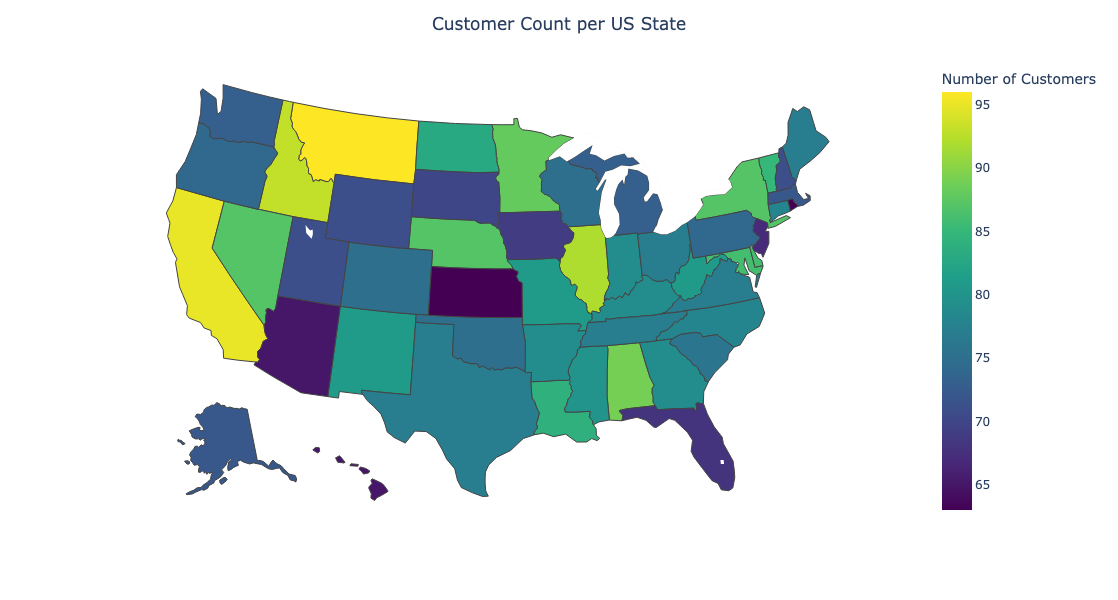

In [23]:
import plotly.express as px
import pandas as pd

# Exploratory Data Analysis (EDA) - US States Map - Total Customer By State
df = pd.read_csv("shopping_trends.csv")

# Count Total
state_counts = df['Location'].value_counts().reset_index()
state_counts.columns = ['State', 'Customer_Count']

# State Code Mapping
state_abbreviations = {
    'Kentucky': 'KY', 'Maine': 'ME', 'Massachusetts': 'MA', 'Rhode Island': 'RI', 
    'Oregon': 'OR', 'Wyoming': 'WY', 'Montana': 'MT', 'Louisiana': 'LA', 
    'West Virginia': 'WV', 'Missouri': 'MO', 'Arkansas': 'AR', 'Hawaii': 'HI', 
    'Delaware': 'DE', 'New Hampshire': 'NH', 'New York': 'NY', 'Alabama': 'AL', 
    'Mississippi': 'MS', 'North Carolina': 'NC', 'California': 'CA', 'Oklahoma': 'OK', 
    'Florida': 'FL', 'Texas': 'TX', 'Nevada': 'NV', 'Kansas': 'KS', 'Colorado': 'CO', 
    'North Dakota': 'ND', 'Illinois': 'IL', 'Indiana': 'IN', 'Arizona': 'AZ', 
    'Alaska': 'AK', 'Tennessee': 'TN', 'Ohio': 'OH', 'New Jersey': 'NJ', 
    'Maryland': 'MD', 'Vermont': 'VT', 'New Mexico': 'NM', 'South Carolina': 'SC', 
    'Idaho': 'ID', 'Pennsylvania': 'PA', 'Connecticut': 'CT', 'Utah': 'UT', 
    'Virginia': 'VA', 'Georgia': 'GA', 'Nebraska': 'NE', 'Iowa': 'IA', 
    'South Dakota': 'SD', 'Minnesota': 'MN', 'Washington': 'WA', 'Wisconsin': 'WI', 
    'Michigan': 'MI'
}
state_counts['State Abbreviation'] = state_counts['State'].map(state_abbreviations)

# Filter out unknown
state_counts = state_counts.dropna(subset=['State Abbreviation'])

# US Map Plot
fig = px.choropleth(state_counts, 
    locations='State Abbreviation', 
    locationmode="USA-states", 
    color='Customer_Count', 
    hover_name='State', 
    color_continuous_scale="Viridis",
    labels={'Customer_Count': 'Number of Customers'})

fig.update_geos(scope="usa")
fig.update_layout(
    title_text='Total Customer per US State',
    title_x=0.5,
    height=600 
)
fig.show()